# Simple bucket with a hole model
This model is basically just for demonstration. This is an example run of the Python implimentation of the model.
## bmi_bucket
This is the code for the Basic Model Interface (BMI) that is used to call the bucket model and interact with other models via the Framework, or driving code. This code contains all the required BMI functions to run the CFE, including 
 - initialize: Perform startup tasks for the model.
 - update: Advance model state by one time step. Calls the function `run_cfe` from `cfe.py`
 - update_until: Advance model state until the given time.
 - finalize: Perform tear-down tasks for the model.
 - get_value: Get a copy of values of a given variable.
 - set_value: Set the values of a given variable.
 - etc.  
 These functions need to be called by a framework or driving code, an example of which is below.

In [1]:
import time
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import bmi_bucket

### Create an instance of the model with a specific configuration that corresponds to a particular catchmenmt.

In [2]:
bucket_instance = bmi_bucket.BMI_BUCKET()

### This initialization function should perform all tasks that are to take place before entering the model’s time loop. Models should be refactored, if necessary, to read their inputs (which could include filenames for other input files) from a configuration file. BMI does not impose any constraint on how configuration files are formatted.

In [3]:
bucket_instance.initialize(cfg_file='./cat_58_config_bucket.json', current_time_step=0)

### Open the forcing file contained within the configuration file. We can run the model with any forcing. This is only an example. The path to the forcing file is contained within the configuration file, but it doesn't really need to be. This is just for organization.

In [4]:
with open(bucket_instance.forcing_file, 'r') as f:
    df_forcing = pd.read_csv(f)

### We will want to visualize the model output

In [5]:
outputs=bucket_instance.get_output_var_names()
output_lists = {output:[] for output in outputs}

### Now we loop through the forcing data and use it to run the model at each time step

In [6]:
for precip in df_forcing['APCP_surface']:
    
    bucket_instance.set_value('atmosphere_water__time_integral_of_precipitation_mass_flux', precip)
    
    bucket_instance.update()
    
    for output in outputs:
    
        output_lists[output].append(bucket_instance.get_value(output))
        

### The finalize function should perform all tasks that take place after exiting the model’s time loop. This typically includes deallocating memory, closing files and printing reports.

In [7]:
bucket_instance.finalize(print_mass_balance=True)


MASS BALANCE
  initial:   0.0000
  input: 259.2000
  output:   0.0000
  final:   2.5968
  lost: -25.1970
  overflow: 118.1994
  outlet: 223.7005
  residual: -6.0100e+01


### Here we are just plotting the fluxes.

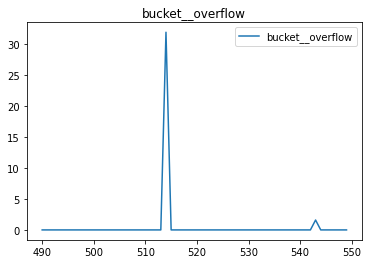

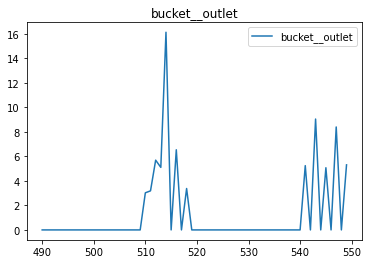

In [8]:
istart_plot=490
iend_plot=550
x = list(range(istart_plot, iend_plot))
for output in outputs:
    plt.plot(x, output_lists[output][istart_plot:iend_plot], label=output)
    plt.title(output)
    plt.legend()
    plt.show()
    plt.close()

### Here we are just going to run the unit test that compares with the origional author code. Kind of the same thing done above, but there is a function in the BMI code that does it all at once.